Populating the interactive namespace from numpy and matplotlib


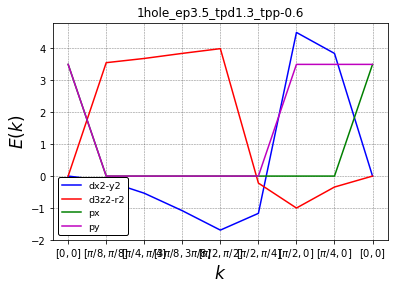

In [15]:
%pylab inline

import math
import numpy as np
import scipy.sparse as sps
import scipy.sparse.linalg
import sys
import matplotlib.pyplot as plt
sys.path.append('../../src/')

from pylab import *
from hamiltonian import Parameters

M_PI = math.pi
ed = 0
ep = 3.5
tpd = 1.3
tpp = -0.6
eta = 0.1

Kxys = [(0,0),(M_PI/2.,M_PI/2.)]

wmin = -5.0
wmax = 20.0
                        
prm = Parameters(tpd,tpp,ed,ep,eta)

def create_h0_matrix(prm,kx,ky):
    # unpack parameters
    tpd = prm.tpd
    tpp = prm.tpp
    ed = prm.eps_d
    ep = prm.eps_p
    
    sa = sin(kx/2.0)
    sb = sin(ky/2.0)

    M = np.zeros((7,7),dtype='complex')
    M = [[ed,            0,            0,      0,    0,   2*tpd*sa,         -2*tpd*sb],\
         [0,            ed,            0,      0,    0,   2*tpd/sqrt(3)*sa,  2*tpd/sqrt(3)*sb],\
         [0,             0,           ed,      0,    0,     0,               0], \
         [0,             0,            0,     ed,    0,     0,               0], \
         [0,             0,            0,      0,   ed,     0,               0], \
         [2*tpd*sa,  2*tpd/sqrt(3)*sa, 0,      0,    0,     ep,             -4*tpp*sa*sb], \
         [-2*tpd*sb, 2*tpd/sqrt(3)*sb, 0,      0,    0,  -4*tpp*sa*sb,       ep]] 
    return M

def calc_dispersion(prm,kx,ky):
    h0_matrix = create_h0_matrix(prm,kx,ky)
    eig, vec = np.linalg.eig(h0_matrix)
    return eig

def calc_kspace_gf(prm,kx,ky,wmin,wmax):
    wvals = []
    gf0 = []
    gf1 = []
    gf2 = []
    gf3 = []
    gf4 = []
    gf5 = []
    gf6 = []
    
    h0 = create_h0_matrix(prm,kx,ky)
    w = wmin
    dw = prm.eta/4.0
    while w < wmax:
        diag = (w+prm.eta*(1j))*np.identity(7,dtype='complex')
        matrix = diag - h0
        G0 = np.linalg.inv(matrix)
        gf0.append(G0[0,0])   # 0 denotes dx2-y2 orbital
        gf1.append(G0[1,1])   # 0 denotes dz2 orbital
        gf2.append(G0[2,2])   # 0 denotes dxy orbital
        gf3.append(G0[3,3])   # 0 denotes dxz orbital
        gf4.append(G0[4,4])   # 0 denotes dyz orbital
        gf5.append(G0[5,5])   # 0 denotes px orbital
        gf6.append(G0[6,6])   # 0 denotes py orbital
        wvals.append(w)
        w += dw
        
    #plt.plot(wvals,-np.imag(gf0)/M_PI,'-b',label='dx2-y2')
    #plt.plot(wvals,-np.imag(gf1)/M_PI,'-r',label='d3z2-r2')
    #plt.plot(wvals,-np.imag(gf2)/M_PI,'-g',label='dxy')
    #plt.plot(wvals,-np.imag(gf3)/M_PI,'-m',label='dxz')
    #plt.plot(wvals,-np.imag(gf4)/M_PI,'-k',label='dyz')
    plt.plot(wvals,-np.imag(gf5)/M_PI,'-c',label='px')
    #plt.plot(wvals,-np.imag(gf6)/M_PI,'-y',label='py')
    maxval = max(-np.imag(gf0)/M_PI)
    xlim([-5,20])
    ylim([0,maxval])
    xlabel('$\omega$',fontsize=17)
    ylabel('$A(\omega)$',fontsize=17)
    #text(0.45, 0.1, '(a)', fontsize=16)
    title('1hole_ep'+str(ep)+'_tpd'+str(tpd)+'_tpp'+str(tpp)+'_kx'+str(kx)+'_ky'+str(ky))
    grid('on',linestyle="--", linewidth=0.5, color='black', alpha=0.5)
    legend(loc='best', fontsize=9.5, framealpha=1.0, edgecolor='black')
    savefig(fname+".pdf")
    
for (kx,ky) in Kxys:
    clf()
    fname = 'onehole_ep'+str(ep)+'_tpd'+str(tpd)+'_tpp'+str(tpp)+'_kx'+str(kx)+'_ky'+str(ky)
    calc_kspace_gf(prm,kx,ky,wmin,wmax)

# below is for another purpose
#========================================================
A = []
orb_dz2 = []
orb_dx2 = []
orb_px = []
orb_py = []
kxs = [0, M_PI/8., M_PI/4., M_PI*3./8., M_PI/2., M_PI/2., M_PI/2., M_PI/4., 0]
kys = [0, M_PI/8., M_PI/4., M_PI*3./8., M_PI/2., M_PI/4., 0      , 0,       0]

for idx in range(0,len(kxs)):
    # dx2-y2, d3z2-r2, dxy, dxz, dyz
    kx = kxs[idx]; ky = kys[idx]
    sa = sin(kx/2.0)
    sb = sin(ky/2.0)
    M = [[ed,            0,            0,      0,    0,   2*tpd*sa,         -2*tpd*sb],\
         [0,            ed,            0,      0,    0,   2*tpd/sqrt(3)*sa,  2*tpd/sqrt(3)*sb],\
         [0,             0,           ed,      0,    0,     0,                0], \
         [0,             0,            0,     ed,    0,     0,                0], \
         [0,             0,            0,      0,   ed,     0,                0], \
         [2*tpd*sa,  2*tpd/sqrt(3)*sa, 0,      0,    0,     ep,             -4*tpp*sa*sb], \
         [-2*tpd*sb, 2*tpd/sqrt(3)*sb, 0,      0,    0,  -4*tpp*sa*sb,         ep]] 

    L,_ = np.linalg.eig(M)
    A.append(min(L))
    orb_dx2.append(L[0])
    orb_dz2.append(L[1])
    orb_px.append(L[5])
    orb_py.append(L[6])
    #print kx, ky, L
    #print min(A)
clf()
plt.plot(np.arange(0,len(kxs)),orb_dx2,'-b',label='dx2-y2')
plt.plot(np.arange(0,len(kxs)),orb_dz2,'-r',label='d3z2-r2')
plt.plot(np.arange(0,len(kxs)),orb_px,'-g',label='px')
plt.plot(np.arange(0,len(kxs)),orb_py,'-m',label='py')
xlabel('$k$',fontsize=17)
ylabel('$E(k)$',fontsize=17)
xticks(np.arange(0,len(kxs)), ('[$0,0$]', '[$\pi/8,\pi/8$]', '[$\pi/4,\pi/4$]',
                               '[$3\pi/8,3\pi/8$]', '[$\pi/2,\pi/2$]','[$\pi/2,\pi/4$]',
                               '[$\pi/2,0$]','[$\pi/4,0$]','[$0,0$]'))
#text(0.45, 0.1, '(a)', fontsize=16)
title('1hole_ep'+str(ep)+'_tpd'+str(tpd)+'_tpp'+str(tpp))
grid('on',linestyle="--", linewidth=0.5, color='black', alpha=0.5)
legend(loc='best', fontsize=9.5, framealpha=1.0, edgecolor='black')
savefig("Ek_"+fname+".pdf")